In [1]:
# Importing the required libraries
import matplotlib
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import dtale
import sweetviz as sv

## Loading the dataset

In [2]:
df=pd.read_csv (r"C:\Users\DR. DEBASISH SAHA\Downloads\all_stocks_5yr.csv",low_memory=False, encoding='latin1')
df.head()

date   open   high    low  close    volume Name
0  08-02-2013  15.07  15.12  14.63  14.75   8407500  AAL
1  11-02-2013  14.89  15.01  14.26  14.46   8882000  AAL
2  12-02-2013  14.45  14.51  14.10  14.27   8126000  AAL
3  13-02-2013  14.30  14.94  14.25  14.66  10259500  AAL
4  14-02-2013  14.94  14.96  13.16  13.99  31879900  AAL

## Data Cleaning

In [3]:
df.shape

(619040, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
missing_values_count = df.isnull().sum()
print (missing_values_count)

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [6]:
df.describe()

open           high            low          close  \
count  619029.000000  619032.000000  619032.000000  619040.000000   
mean       83.023334      83.778311      82.256096      83.043763   
std        97.378769      98.207519      96.507421      97.389748   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.245000   
50%        62.590000      63.150000      62.020000      62.620000   
75%        94.370000      95.180000      93.540000      94.410000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume  
count  6.190400e+05  
mean   4.321823e+06  
std    8.693610e+06  
min    0.000000e+00  
25%    1.070320e+06  
50%    2.082094e+06  
75%    4.284509e+06  
max    6.182376e+08

In [7]:
# removing all the rows that contain a missing value
rows_with_na_dropped = df.dropna()
rows_with_na_dropped.head()

date   open   high    low  close    volume Name
0  08-02-2013  15.07  15.12  14.63  14.75   8407500  AAL
1  11-02-2013  14.89  15.01  14.26  14.46   8882000  AAL
2  12-02-2013  14.45  14.51  14.10  14.27   8126000  AAL
3  13-02-2013  14.30  14.94  14.25  14.66  10259500  AAL
4  14-02-2013  14.94  14.96  13.16  13.99  31879900  AAL

In [8]:
# how much data did we lose?
print("Rows in original dataset: %d \n" % df.shape[0])
print("Rows with na's dropped: %d" % rows_with_na_dropped.shape[0])

Rows in original dataset: 619040 

Rows with na's dropped: 619029


In [9]:
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [10]:
# changing the datatype of 'date' column from object to datetime64
df['date'] = pd.to_datetime(df.date,format='%d-%m-%Y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


### Detecting outliers

In [12]:
outliers = []
def detect_outliers_zscore(df):
    thres = 3
    mean = np.mean(df)
    std = np.std(df)
    print("Mean is", mean)
    print("Standard Deviation is", std)
    for i in df:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df['close'])
print("Outliers from Z-scores method: ", sample_outliers)

Mean is 83.04376276476357
Standard Deviation is 97.38966933971017
Outliers from Z-scores method:  [376.64, 381.37, 386.71, 393.62, 392.3, 384.66, 385.96, 384.49, 386.95, 384.89, 387.78, 382.19, 381.25, 384.24, 388.97, 387.65, 395.96, 395.19, 402.2, 402.92, 399.2, 404.39, 398.08, 393.37, 398.79, 397.97, 396.44, 393.63, 398.03, 401.92, 401.01, 397.66, 390.98, 397.54, 395.87, 395.8, 399.61, 407.05, 404.54, 399.87, 387.6, 386.28, 394.43, 384.2, 403.01, 378.77, 377.17, 381.83, 375.43, 378.995, 383.66, 380.14, 378.59, 385.37, 384.8, 380.16, 385.655, 384.61, 382.72, 387.83, 380.09, 378.56, 378.49, 377.04, 381.2, 383.54, 382.65, 382.36, 385.11, 383.45, 386.04, 375.56, 389.51, 391.18, 389.8, 389.99, 445.1, 438.56, 429.31, 429.37, 421.78, 422.87, 423.04, 421.19, 419.1, 426.88, 433.69, 432.85, 431.02, 426.87, 432.28, 426.0, 425.24, 421.71, 423.86, 431.63, 427.63, 425.47, 431.42, 426.57, 429.23, 430.92, 430.99, 436.59, 430.78, 426.95, 423.5, 425.48, 430.77, 432.97, 429.92, 423.67, 427.26, 427.81, 

### Limits in which outliers exist

In [13]:
Q1 = df['close'].quantile(0.35)
Q3 = df['close'].quantile(0.65)
print(Q1,Q3)
iqr=Q3-Q1
iqr

48.45 78.81


30.36

In [14]:
upper = Q3+1.5*iqr
lower = Q1+1.5*iqr
print(upper,lower)

124.35 93.99000000000001


In [15]:
df1 = df[df['close']<upper]
df1.shape

(533309, 7)

### Box Plot Visualisation

C:\Users\DR. DEBASISH SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='close'>

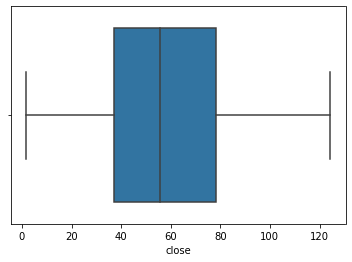

In [16]:
%matplotlib inline
sns.boxplot(df1['close'])

## Now, for 'open' column

In [17]:
outliers = []
def detect_outliers_zscore(df):
    thres = 3
    mean = np.mean(df)
    std = np.std(df)
    print("Mean is", mean)
    print("Standard Deviation is", std)
    for i in df:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df['open'])
print("Outliers from Z-scores method: ", sample_outliers)

Mean is 83.02333431454568
Standard Deviation is 97.37869038884698
Outliers from Z-scores method:  [377.61, 383.5, 389.1, 399.0, 390.11, 383.5, 386.65, 388.35, 388.11, 383.74, 387.34, 381.26, 385.32, 385.03, 390.65, 389.23, 394.27, 396.55, 403.69, 402.52, 401.79, 404.65, 399.41, 394.58, 398.8, 398.29, 395.85, 395.04, 398.47, 403.71, 402.53, 397.98, 392.13, 398.94, 393.68, 394.26, 403.0, 408.0, 401.0, 398.16, 390.5, 387.4, 392.16, 393.77, 376.62, 375.72, 377.32, 378.77, 378.41, 377.72, 378.62, 383.44, 378.65, 377.27, 384.07, 384.0, 380.85, 383.95, 385.71, 385.61, 385.52, 378.4, 377.45, 376.29, 378.07, 375.17, 376.15, 380.66, 384.31, 383.53, 383.51, 384.65, 383.69, 382.63, 378.55, 391.31, 391.91, 390.21, 439.0, 443.86, 438.51, 426.75, 427.11, 423.82, 424.8, 422.85, 421.43, 424.15, 430.75, 432.51, 431.08, 429.98, 429.45, 428.0, 426.0, 424.87, 420.6, 428.0, 431.55, 426.2, 427.45, 429.71, 427.23, 430.4, 430.07, 434.4, 434.4, 429.66, 425.62, 422.96, 426.46, 432.29, 431.25, 427.66, 424.15, 428

In [18]:
Q1 = df['open'].quantile(0.35)
Q3 = df['open'].quantile(0.65)
print(Q1,Q3)
iqr=Q3-Q1
iqr

48.44 78.79


30.35000000000001

In [19]:
upper = Q3+1.5*iqr
lower = Q1+1.5*iqr
print(upper,lower)

124.31500000000003 93.965


In [20]:
df2 = df[df['open']<upper]
df2.shape

(533292, 7)

C:\Users\DR. DEBASISH SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='open'>

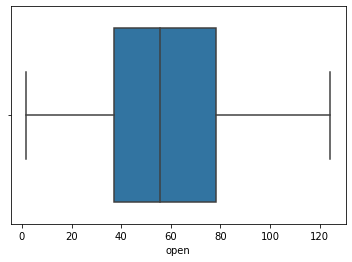

In [21]:
%matplotlib inline
sns.boxplot(df2['open'])

## For 'high' column

In [22]:
outliers = []
def detect_outliers_zscore(df):
    thres = 3
    mean = np.mean(df)
    std = np.std(df)
    print("Mean is", mean)
    print("Standard Deviation is", std)
    for i in df:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df['high'])
print("Outliers from Z-scores method: ", sample_outliers)

Mean is 83.77831069346551
Standard Deviation is 98.2074395809719
Outliers from Z-scores method:  [382.5, 387.0, 394.0999, 399.0, 390.949, 389.69, 386.65, 388.35, 388.21, 389.06, 388.98, 385.0, 389.42, 391.7, 391.36, 396.3, 397.29, 404.72, 405.0, 403.7249, 404.52, 405.63, 399.92, 398.83, 399.36, 402.71, 397.0, 398.47, 403.0, 406.89, 403.764, 399.78, 398.63, 399.31, 399.29, 403.49, 407.8, 408.06, 406.17, 400.2, 394.1, 394.74, 392.85, 406.25, 383.11, 378.56800000000004, 378.85, 379.0, 379.0, 378.8, 378.51, 383.0, 379.985, 381.88, 383.7, 384.54, 380.48, 387.85, 389.37, 385.99, 385.9, 386.1, 387.9, 388.4182, 387.0, 379.33, 379.37, 381.77, 380.5, 380.2, 379.31, 381.58, 384.42, 387.12, 385.28, 387.81, 385.78, 387.45, 383.56, 391.94, 394.6, 394.28, 391.88, 452.65, 446.99, 439.0, 434.24, 431.75, 425.64, 429.77, 427.51, 422.7165, 428.5, 435.2, 439.0, 433.25, 433.528, 433.0, 430.3962, 427.27, 428.24, 427.1, 436.9, 432.44, 427.0, 431.85, 431.35, 432.5, 433.16, 433.23, 438.39, 436.755, 430.8, 426.8

In [23]:
Q1 = df['high'].quantile(0.35)
Q3 = df['high'].quantile(0.65)
print(Q1,Q3)
iqr=Q3-Q1
iqr

48.9 79.47


30.57

In [24]:
upper = Q3+1.5*iqr
lower = Q1+1.5*iqr
print(upper,lower)

125.325 94.755


In [25]:
df3 = df[df['high']<upper]
df3.shape

(533194, 7)

C:\Users\DR. DEBASISH SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='high'>

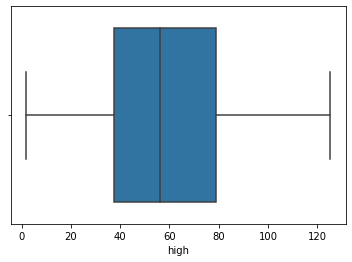

In [26]:
%matplotlib inline
sns.boxplot(df3['high'])

## For 'low' column

In [27]:
outliers = []
def detect_outliers_zscore(df):
    thres = 3
    mean = np.mean(df)
    std = np.std(df)
    print("Mean is", mean)
    print("Standard Deviation is", std)
    for i in df:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df['low'])
print("Outliers from Z-scores method: ", sample_outliers)

Mean is 82.25609641375557
Standard Deviation is 96.50734310778844
Outliers from Z-scores method:  [373.18, 374.8175, 382.611, 388.62, 389.1, 383.1, 381.4914, 381.371, 383.83, 382.57, 383.02, 382.0, 379.5, 383.8, 385.0, 386.5, 383.1, 392.6, 395.78, 399.2, 396.37, 396.81, 396.25, 392.45, 393.8, 394.02, 396.22, 388.42, 394.29, 396.04, 398.44, 393.8, 388.45, 391.29, 392.534, 389.41, 393.66, 401.6, 402.0, 397.79, 387.27, 380.49, 387.12, 383.24, 387.7, 374.88, 375.0, 373.15, 377.01, 372.67, 372.85, 373.43, 375.84, 378.0, 376.16, 376.54, 383.28, 379.79, 379.481, 381.601, 382.19, 383.89, 378.88, 375.28, 372.19, 375.92, 374.94, 372.27, 374.03, 374.65, 378.795, 381.3151, 380.14, 381.2101, 381.64, 383.55, 374.4, 377.0, 386.8, 388.0, 386.15, 439.0, 437.41, 428.04, 426.03, 419.24, 416.0, 422.42, 421.02, 414.55, 422.85, 430.17400000000004, 431.37, 426.71, 425.8, 427.01, 424.3, 421.46, 420.63, 418.36, 428.0, 427.61, 422.0, 425.01, 425.47, 427.23, 426.2, 426.25, 432.75, 429.26, 426.5, 421.425, 419.14,

In [28]:
Q1 = df['low'].quantile(0.35)
Q3 = df['low'].quantile(0.65)
print(Q1,Q3)
iqr=Q3-Q1
iqr

47.98 78.1


30.119999999999997

In [29]:
upper = Q3+1.5*iqr
lower = Q1+1.5*iqr
print(upper,lower)

123.27999999999999 93.16


In [30]:
df4 = df[df['low']<upper]
df4.shape

(533390, 7)

C:\Users\DR. DEBASISH SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='low'>

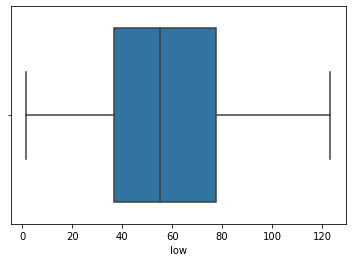

In [31]:
%matplotlib inline
sns.boxplot(df4['low'])

## For 'volume' column

In [32]:
outliers = []
def detect_outliers_zscore(df):
    thres = 3
    mean = np.mean(df)
    std = np.std(df)
    print("Mean is", mean)
    print("Standard Deviation is", std)
    for i in df:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df['volume'])
print("Outliers from Z-scores method: ", sample_outliers)

Mean is 4321823.395568945
Standard Deviation is 8693602.490117
Outliers from Z-scores method:  [31879900, 78591200, 40091800, 30725800, 43197268, 38843371, 37320111, 40644263, 41471585, 31018666, 34532913, 39941285, 33292004, 41837891, 137767165, 51460347, 36049898, 158168416, 129029425, 151829363, 118721995, 88809154, 97924631, 108854046, 118891367, 111596821, 82583823, 92899597, 125096657, 146674682, 80532382, 137899041, 145406366, 159298020, 114903180, 116992841, 97854442, 118272126, 116268341, 101369051, 75834906, 160710606, 150441144, 131531708, 77016849, 95493524, 98570591, 125073165, 73428208, 81854409, 110698007, 97294421, 132350022, 90719482, 89589332, 95743088, 75169647, 76615504, 93895844, 82073628, 59651011, 79157071, 76222076, 236138966, 166438048, 152194413, 107338322, 160760747, 242387530, 95984896, 191006032, 159958876, 172737600, 126720237, 105449078, 90319201, 124017747, 120499960, 118010781, 99555337, 83631828, 79220953, 111647130, 185278968, 150794546, 106973181, 11

In [33]:
Q1 = df['volume'].quantile(0.35)
Q3 = df['volume'].quantile(0.65)
print(Q1,Q3)
iqr=Q3-Q1
iqr

1410247.25 3121189.2500000005


1710942.0000000005

In [34]:
upper = Q3+1.5*iqr
lower = Q1+1.5*iqr
print(upper,lower)

5687602.250000002 3976660.250000001


In [35]:
df5 = df[df['volume']<upper]
df5.shape

(508383, 7)

C:\Users\DR. DEBASISH SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='volume'>

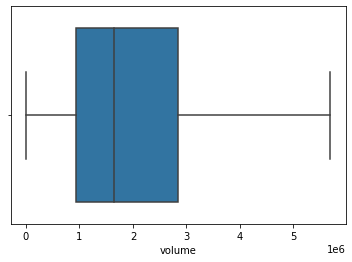

In [36]:
%matplotlib inline
sns.boxplot(df5['volume'])

## Data Insights

In [37]:
df.groupby('Name').mean()

open        high         low       close        volume
Name                                                              
A      49.187863   49.600059   48.782026   49.202025  2.338039e+06
AAL    38.390495   38.955554   37.825605   38.393252  9.390321e+06
AAP   132.439631  133.818297  131.036025  132.433463  1.078043e+06
AAPL  109.055429  109.951118  108.141589  109.066698  5.404790e+07
ABBV   60.802801   61.474133   60.177275   60.864440  7.870683e+06
...          ...         ...         ...         ...           ...
XYL    41.415473   41.763885   41.076026   41.434095  1.183141e+06
YUM    75.422099   76.027123   74.844914   75.451009  3.209032e+06
ZBH   105.542014  106.419854  104.698038  105.606291  1.297144e+06
ZION   32.161477   32.509290   31.802241   32.171790  2.621178e+06
ZTS    45.091389   45.488826   44.665588   45.098648  3.681878e+06

[505 rows x 5 columns]

In [38]:
df.Name.value_counts()

FIS     1259
LH      1259
AMD     1259
CA      1259
TAP     1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

<AxesSubplot:xlabel='Name'>

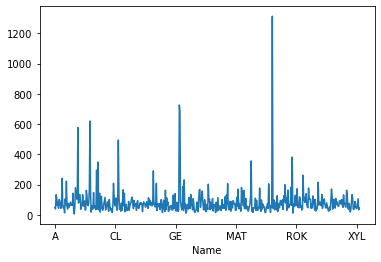

In [39]:
%matplotlib inline
df.groupby('Name').mean()['close'].plot()

In [40]:
stocks = df.pivot_table(values='close', columns='Name', index='date')
stocks.head()

Name            A    AAL    AAP     AAPL   ABBV    ABC    ABT    ACN   ADBE  \
date                                                                          
2013-02-08  45.08  14.75  78.90  67.8542  36.25  46.89  34.41  73.31  39.12   
2013-02-11  44.60  14.46  78.39  68.5614  35.85  46.76  34.26  73.07  38.64   
2013-02-12  44.62  14.27  78.60  66.8428  35.42  46.96  34.30  73.37  38.89   
2013-02-13  44.75  14.66  78.97  66.7156  35.27  46.64  34.46  73.56  38.81   
2013-02-14  44.58  13.99  78.84  66.6556  36.57  46.77  34.70  73.13  38.61   

Name          ADI  ...     XL   XLNX    XOM   XRAY    XRX    XYL    YUM  \
date               ...                                                    
2013-02-08  45.70  ...  28.24  37.51  88.61  42.87  31.84  27.09  65.30   
2013-02-11  46.08  ...  28.31  37.46  88.28  42.84  31.96  27.46  64.55   
2013-02-12  46.27  ...  28.41  37.58  88.46  42.87  31.84  27.95  64.75   
2013-02-13  46.26  ...  28.42  37.80  88.67  43.08  32.00  28.26  64.41   
2013-02-14  46.54  ...  28.22  38.44  88.52  42.91  32.12  28.47  63.89   

Name          ZBH   ZION    ZTS  
date                             
2013-02-08  75.85  24.14  33.05  
2013-02-11  75.65  24.21  33.26  
2013-02-12  75.44  24.49  33.74  
2013-02-13  76.00  24.74  33.55  
2013-02-14  76.34  24.63  33.27  

[5 rows x 505 columns]

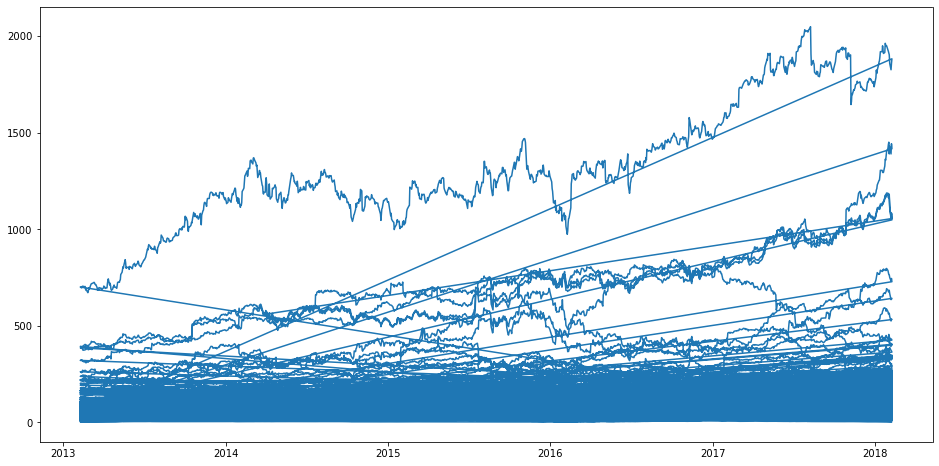

In [41]:
df['date'] = pd.to_datetime(df.date,format='%d-%m-%Y')
df.index = df['date']
df.dropna(inplace=True)
#plot
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(df['close'], label='Close Price history')

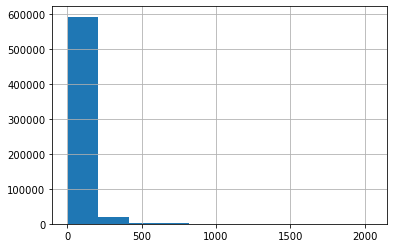

In [42]:
df['close'].hist()
plt.show()

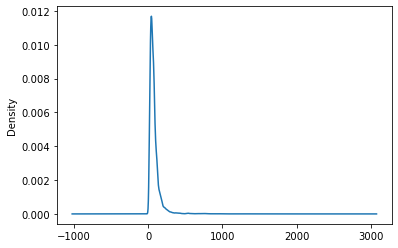

In [43]:
# kernel density plot
%matplotlib inline
df['close'].plot(kind='kde')
plt.show()

<AxesSubplot:xlabel='date'>

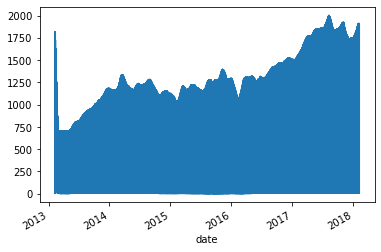

In [44]:
%matplotlib inline
open_mean = df['open'].rolling(20,win_type=None).mean()
open_mean.plot(style=['-', '--', ':'])

<AxesSubplot:xlabel='date'>

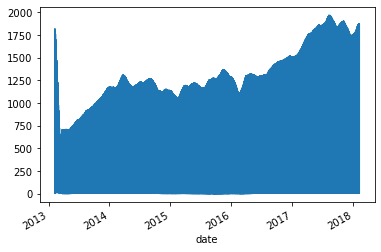

In [45]:
%matplotlib inline
close_mean = df['close'].rolling(30,win_type=None).mean()
close_mean.plot(style=['-', '--', ':'])

In [46]:
# creating the column ‘daily lag’ which is basically just shifting the ‘close’ price by one day back
df['daily lag'] = df['close'].shift(1)
df.head()

date   open   high    low  close    volume Name  daily lag
date                                                                       
2013-02-08 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL        NaN
2013-02-11 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL      14.75
2013-02-12 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL      14.46
2013-02-13 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL      14.27
2013-02-14 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL      14.66

The reason for creating the ‘daily lag’ is to allow us to create the column ‘daily returns'.

In [47]:
df['daily returns'] = (df['daily lag']/df['close']) -1
df.head()

date   open   high    low  close    volume Name  daily lag  \
date                                                                          
2013-02-08 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL        NaN   
2013-02-11 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL      14.75   
2013-02-12 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL      14.46   
2013-02-13 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL      14.27   
2013-02-14 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL      14.66   

            daily returns  
date                       
2013-02-08            NaN  
2013-02-11       0.020055  
2013-02-12       0.013315  
2013-02-13      -0.026603  
2013-02-14       0.047891

Daily returns tells us the returns that we obtain in a day after the stock price closes.

<AxesSubplot:>

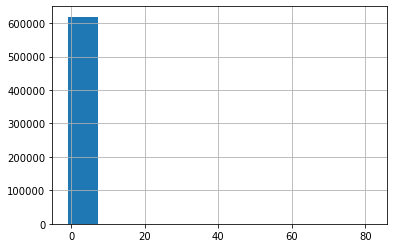

In [48]:
## analysing the daily returns
df['daily returns'].hist()

In [49]:
# calculating mean and standard deviation
mean = df['daily returns'].mean()
std = df['daily returns'].std()
print('Mean =',mean)
print('Standard deviation =',std)

Mean = 0.0012797847113523795
Standard deviation = 0.16380160385474327


Generally returns are negative but remember that this only considers the returns on a day-to-day basis and so it just tells you that in general the return if you buy and sell on the same day, you will make a loss.

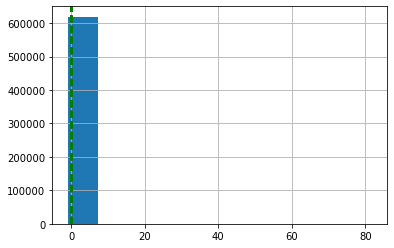

In [50]:
df['daily returns'].hist()
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)

#to plot the standard line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

In [51]:
# finding kurtosis value
df['daily returns'].kurtosis()

119449.56829291262

Kurtosis tells you the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.

## Checking individual stock data

In [52]:
def stocks(name):
    c=df[df['Name']==name]
    c = c.set_index('date')
    plt.plot(c['close'])
    plt.title(name + ' Stocks')

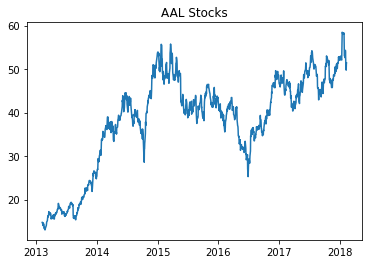

In [53]:
stocks('AAL')

## Automated EDA

In [63]:
d = dtale.show(df)
d.open_browser()

In [64]:
#descriptive statistics
pandas_profiling.ProfileReport(df)

In [54]:
my_report  = sv.analyze([df,'Train'], target_feat='close')
my_report.show_html('FinalReport.html')


Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [55]:
df1 = sv.compare(df[100:], df[:100])
df1.show_html('Compare.html')


Report Compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [56]:
advert_report = sv.analyze(df)

In [57]:
advert_report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
    max_rows_analyzed is smaller than dataset shape 619040...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0

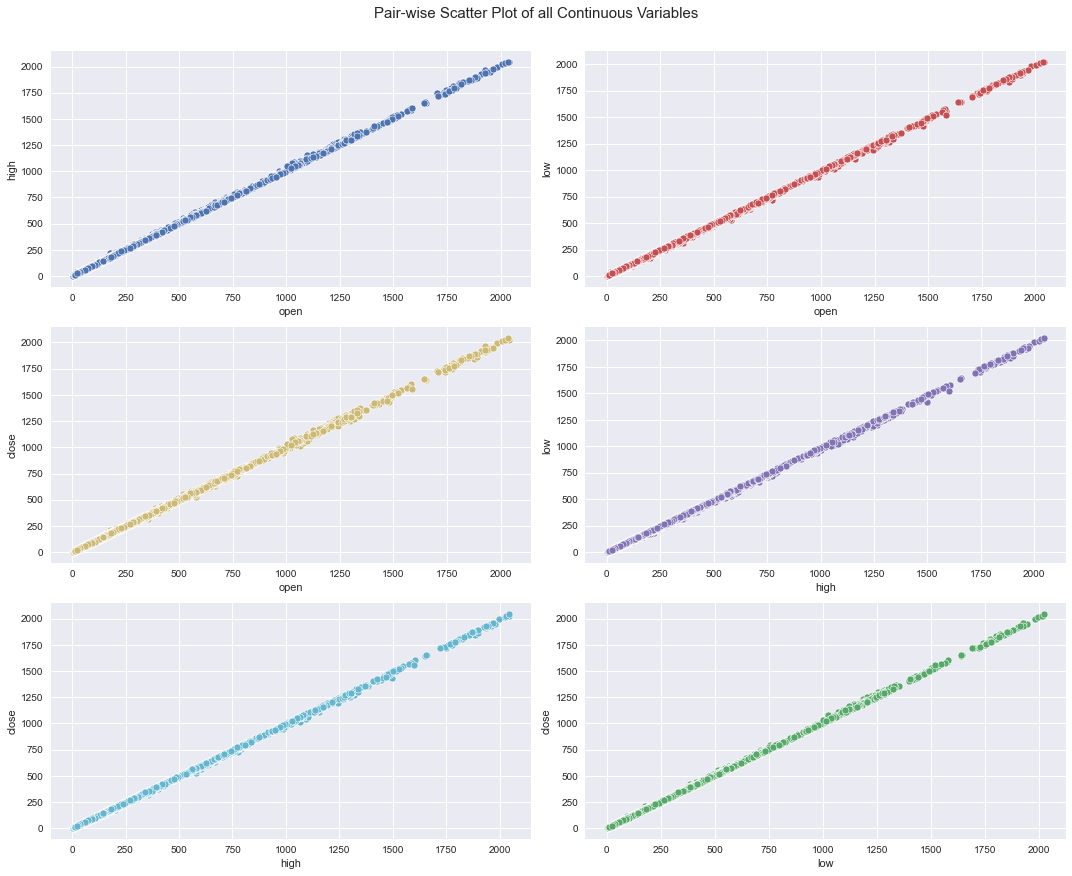

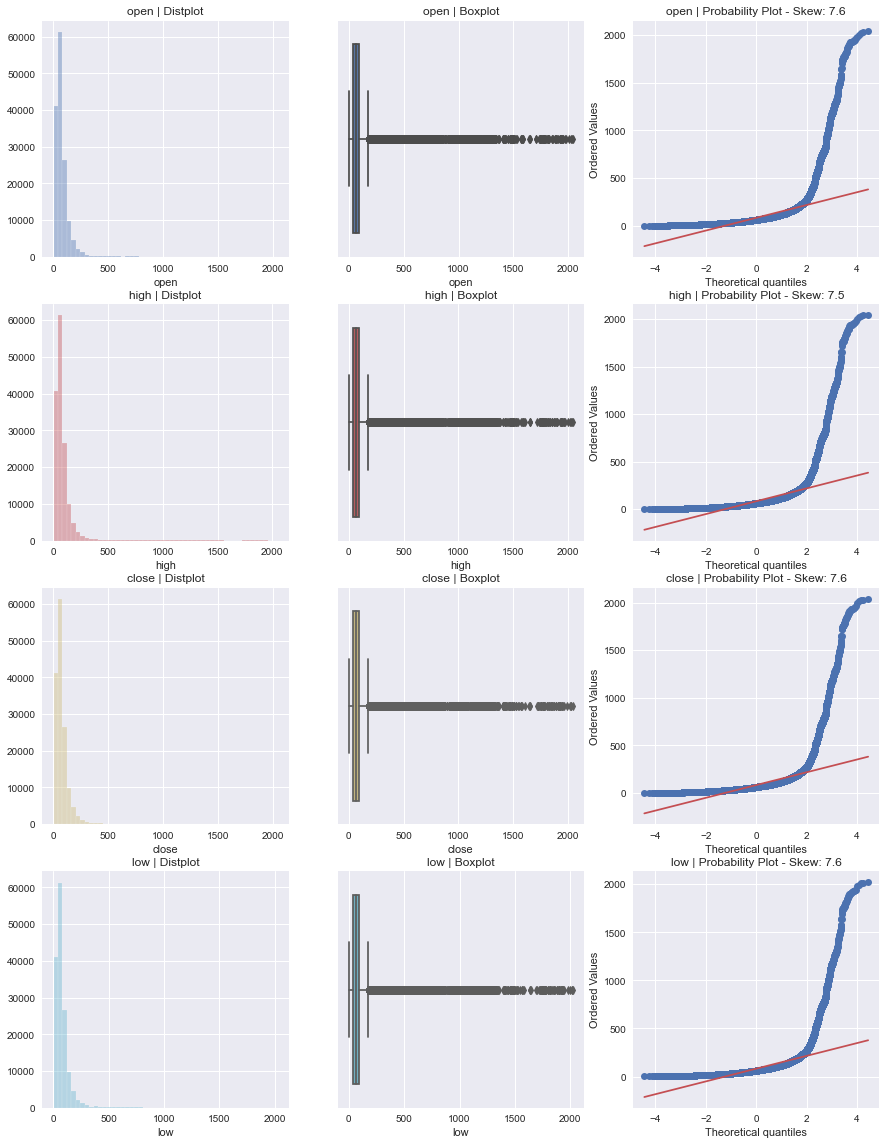

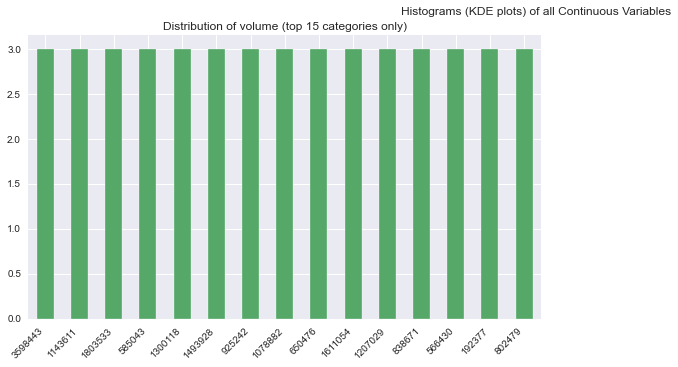

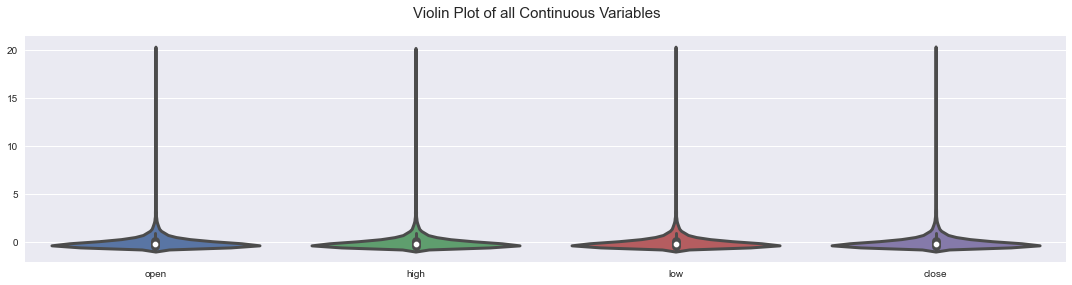

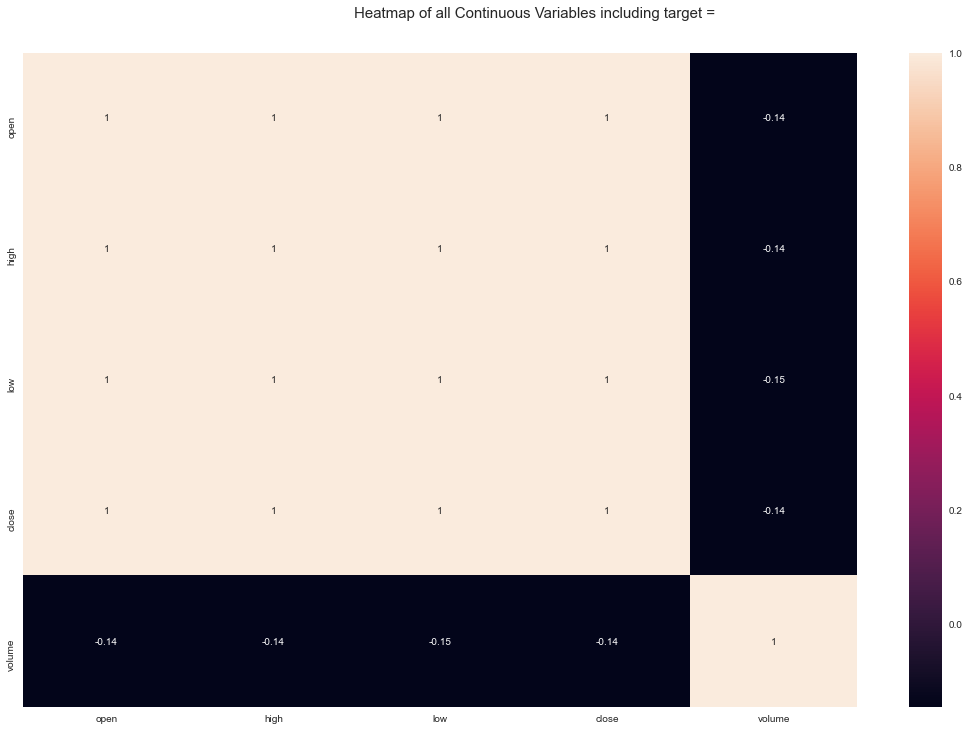

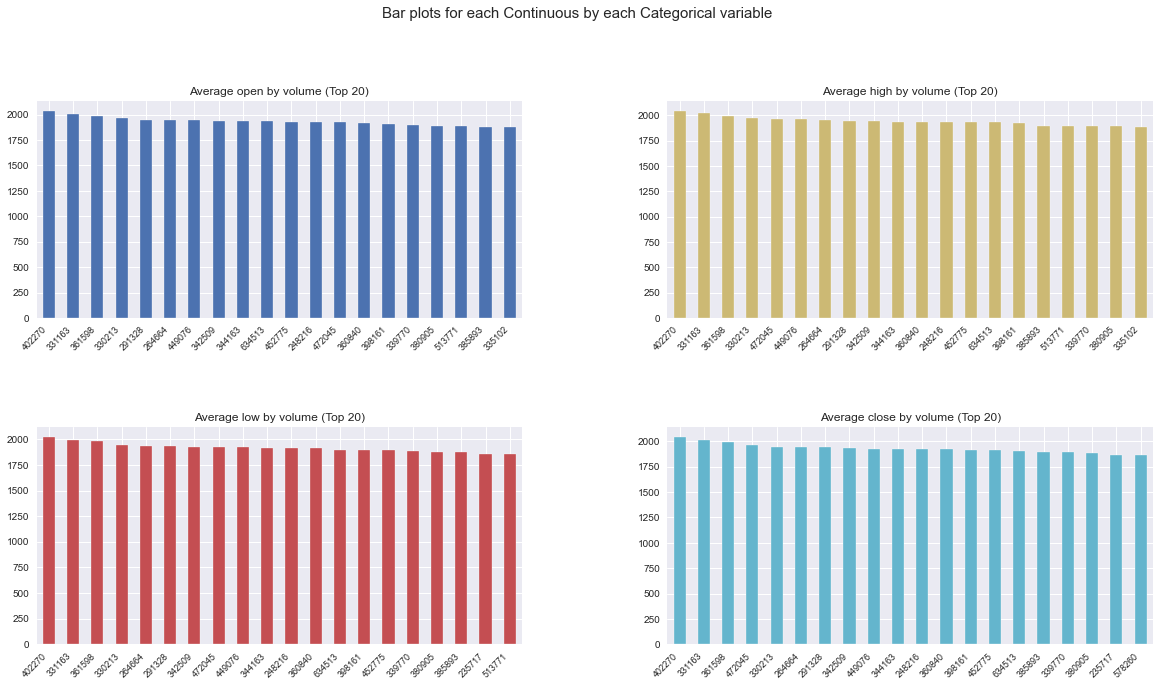

Time to run AutoViz (in seconds) = 16.894

 ###################### VISUALIZATION Completed ########################


In [58]:
from wordcloud import WordCloud
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz(r"C:\Users\DR. DEBASISH SAHA\Downloads\all_stocks_5yr.csv")

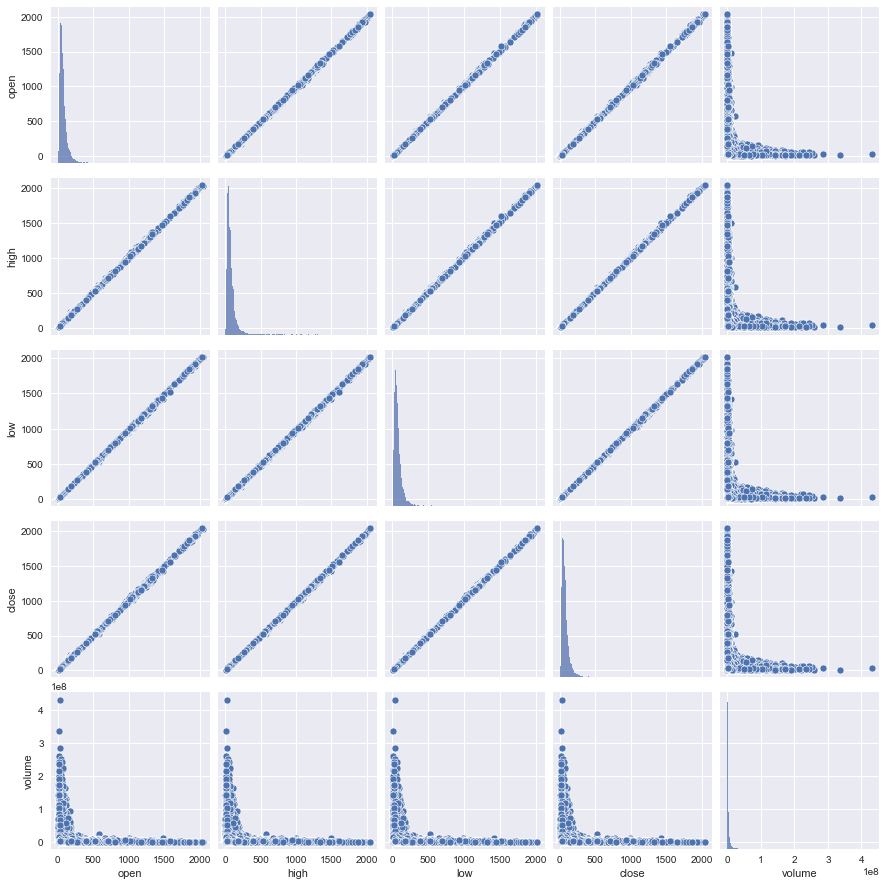

In [59]:
sns.pairplot(df)